In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# 1. Euclidean Distance

1.1 Euclide|an Distance 2D

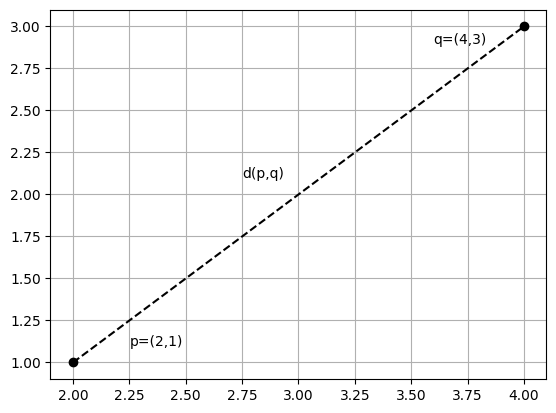

In [2]:
x = [2,4]
y = [1,3]
plt.plot(x,y,color='black',linestyle='dashed',marker='o')
plt.text(2.25,1.1,"p=(2,1)")
plt.text(3.6,2.9,"q=(4,3)")
plt.text(2.75,2.1,"d(p,q)")
#plt.scatter(x,y,color='red',marker='o')
plt.grid('on')

How to compute the distance between two given points


$$
  d(p,q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2}
$$

In general can for arbitrary n:

$$
  d(p,q) = \sqrt{\sum_{i=1}^n(p_i - q_i)^2}
$$

Define a function to compute Euclidian Distance

In [3]:
def edist(p,q):
    dist = 0.0
    for pi,qi in zip(p,q):
        dist += (pi-qi)*(pi-qi)
    return np.sqrt(dist)

In [4]:
p = [2,1]
q = [4,3]

In [5]:
print(edist(p,q))

2.8284271247461903


Use scipy library to compute Euclidean

In [6]:
dist = scipy.spatial.distance.euclidean(p,q)
dist

2.8284271247461903

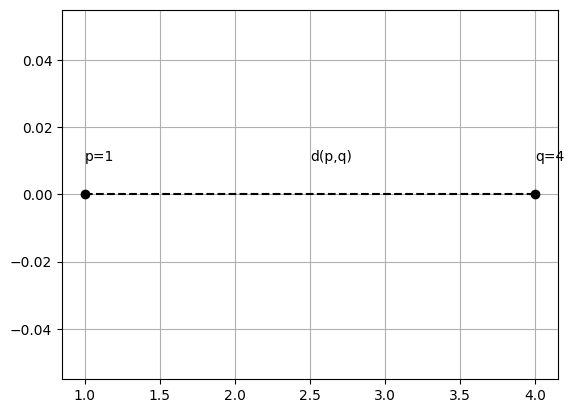

In [7]:
x = [1,4]
y = [0,0]
plt.plot(x,y,color='black',linestyle='dashed',marker='o')
plt.text(1,0.01,"p=1")
plt.text(4,0.01,"q=4")
plt.text(2.5,0.01,"d(p,q)")
#plt.scatter(x,y,color='red',marker='o')
plt.grid('on')

$$
  d(p,q) = \sqrt{(p - q)^2}
$$

1.2 Euclidian Distance 3D

# 2. Probability and Eucleadian Distance

2.1 Normal Distribution 1D

$$
  Gauss\_pdf = \frac{1}{\sigma\sqrt{\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$


$$
  Gauss\_pdf = A*e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$


$$
  (x-\mu)^2 = Eucleadian\_Distance^2
$$


In [8]:
def norm_1d(x,mu,sig):
    return (1/(sig*math.sqrt(math.pi)))*math.e**(-(x-mu)*(x-mu)/(2*sig*sig))

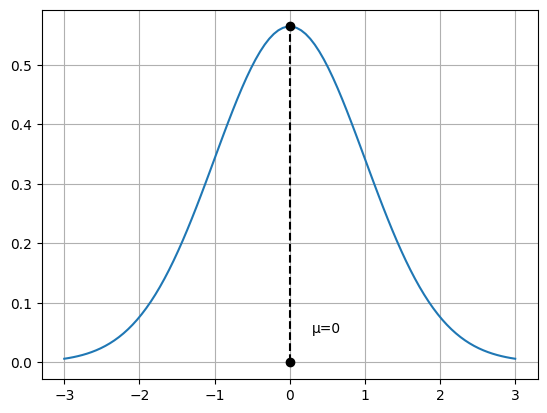

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma= math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
norm_pdf = (1/(sigma*math.sqrt(math.pi)))*math.e**(-(x-mu)*(x-mu)/(2*sigma*sigma))
#plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, norm_pdf)
plt.plot([0,0],[0,norm_1d(0,0,1)],color='black',linestyle='dashed',marker='o')
plt.grid('on')
plt.text(0.3,0.05,"μ=0")
plt.show()

In [10]:
norm_1d(0,0,1)

0.5641895835477563

In [11]:
math.e

2.718281828459045

2.2 Normal Distribition 2D

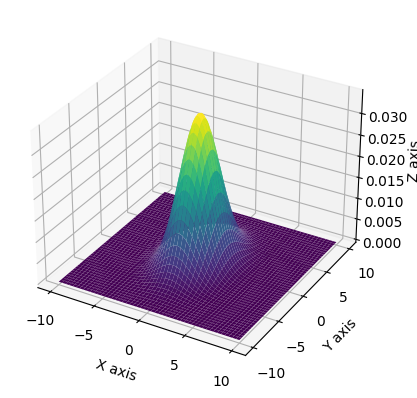

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 7

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [13]:
def f(z, μ, Σ):
    """
    The density function of multivariate normal distribution.

    Parameters
    ---------------
    z: ndarray(float, dim=2)
        random vector, N by 1
    μ: ndarray(float, dim=1 or 2)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1
    """

    z = np.atleast_2d(z)
    μ = np.atleast_2d(μ)
    Σ = np.atleast_2d(Σ)

    N = z.size

    temp1 = np.linalg.det(Σ) ** (-1/2)
    temp2 = np.exp(-.5 * (z - μ).T @ np.linalg.inv(Σ) @ (z - μ))

    return (2 * np.pi) ** (-N/2) * temp1 * temp2

In [14]:
#Sigma = np.random.rand(2,2)
Sigma = np.zeros((2,2))
Sigma[0,0] = 2
Sigma[1,1] = 5
Sigma

array([[2., 0.],
       [0., 5.]])

In [15]:
np.linalg.det(Sigma)

9.999999999999998

In [16]:
mu = np.zeros((1,1))
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
z = np.vstack((x,y))
z.shape

(2, 500)

In [17]:
temp2 = np.exp(-.5 * (z - mu).T @ np.linalg.inv(Sigma) @ (z - mu))
temp2

array([[6.30511676e-16, 7.25464569e-16, 8.34717042e-16, ...,
        1.19801076e+15, 1.37842707e+15, 1.58601345e+15],
       [7.25464569e-16, 8.34247857e-16, 9.59343181e-16, ...,
        1.04237985e+15, 1.19868453e+15, 1.37842707e+15],
       [8.34717042e-16, 9.59343181e-16, 1.10257643e-15, ...,
        9.06966602e+14, 1.04237985e+15, 1.19801076e+15],
       ...,
       [1.19801076e+15, 1.04237985e+15, 9.06966602e+14, ...,
        1.10257643e-15, 9.59343181e-16, 8.34717042e-16],
       [1.37842707e+15, 1.19868453e+15, 1.04237985e+15, ...,
        9.59343181e-16, 8.34247857e-16, 7.25464569e-16],
       [1.58601345e+15, 1.37842707e+15, 1.19801076e+15, ...,
        8.34717042e-16, 7.25464569e-16, 6.30511676e-16]])

In [18]:
μ = np.array([.5, 1.])
Σ = np.array([[1., .5], [.5 ,1.]])

In [19]:
μ

array([0.5, 1. ])

SyntaxError: unexpected character after line continuation character (4254639454.py, line 1)

In [44]:
class MultivariateNormal:
    """
    Class of multivariate normal distribution.

    Parameters
    ----------
    μ: ndarray(float, dim=1)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1

    Arguments
    ---------
    μ, Σ:
        see parameters
    μs: list(ndarray(float, dim=1))
        list of mean vectors μ1 and μ2 in order
    Σs: list(list(ndarray(float, dim=2)))
        2 dimensional list of covariance matrices
        Σ11, Σ12, Σ21, Σ22 in order
    βs: list(ndarray(float, dim=1))
        list of regression coefficients β1 and β2 in order
    """

    def __init__(self, μ, Σ):
        "initialization"
        self.μ = np.array(μ)
        self.Σ = np.atleast_2d(Σ)

    def partition(self, k):
        """
        Given k, partition the random vector z into a size k vector z1
        and a size N-k vector z2. Partition the mean vector μ into
        μ1 and μ2, and the covariance matrix Σ into Σ11, Σ12, Σ21, Σ22
        correspondingly. Compute the regression coefficients β1 and β2
        using the partitioned arrays.
        """
        μ = self.μ
        Σ = self.Σ

        self.μs = [μ[:k], μ[k:]]
        self.Σs = [[Σ[:k, :k], Σ[:k, k:]],
                   [Σ[k:, :k], Σ[k:, k:]]]

        self.βs = [self.Σs[0][1] @ np.linalg.inv(self.Σs[1][1]),
                   self.Σs[1][0] @ np.linalg.inv(self.Σs[0][0])]

    def cond_dist(self, ind, z):
        """
        Compute the conditional distribution of z1 given z2, or reversely.
        Argument ind determines whether we compute the conditional
        distribution of z1 (ind=0) or z2 (ind=1).

        Returns
        ---------
        μ_hat: ndarray(float, ndim=1)
            The conditional mean of z1 or z2.
        Σ_hat: ndarray(float, ndim=2)
            The conditional covariance matrix of z1 or z2.
        """
        β = self.βs[ind]
        μs = self.μs
        Σs = self.Σs

        μ_hat = μs[ind] + β @ (z - μs[1-ind])
        Σ_hat = Σs[ind][ind] - β @ Σs[1-ind][1-ind] @ β.T

        return μ_hat, Σ_hat

In [45]:
multi_normal = MultivariateNormal(μ, Σ)

In [46]:
multi_normal

In [20]:
def multi_norm(z, mu, Sig):
    """
    The density function of multivariate normal distribution.

    Parameters
    ---------------
    z: ndarray(float, dim=2)
        random vector, N by 1
    μ: ndarray(float, dim=1 or 2)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1
    """

    print('z',z.shape)
    print('mu',mu.shape)
    zmu = z - mu
    print('zmu.shape',zmu.shape)
    zmut = zmu.T
    print('zmut.shape',zmut.shape)
     
    invSig = np.linalg.inv(Sig)
    print('invSig',invSig.shape)

    det_mult = np.linalg.det(Σ) ** (-1/2)
    
    z = np.atleast_2d(z)
    mu = np.atleast_2d(μ)
    Sig = np.atleast_2d(Σ)

    N = z.shape[0]

    #temp1 = np.linalg.det(Σ) ** (-1/2)
    #temp2 = np.exp(-.5 * (z - μ).T @ np.linalg.inv(Σ) @ (z - μ))

    temp1 = zmut@invSig
    print('temp1',temp1.shape)
    temp2 = temp1@zmu
    print('temp2',temp2.shape)
    
    prob = det_mult*np.exp(- temp2/2 )
    print('prob',prob.shape)

    return (2 * np.pi) ** (-N/2) * prob

In [118]:
multi_norm(z_input,mu,Sigma)

z (2, 1)
mu (2, 1)
zmu.shape (2, 1)
zmut.shape (1, 2)
invSig (2, 2)
temp1 (1, 2)
temp2 (1, 1)
prob (1, 1)


array([[0.10471258]])

In [115]:
Sigma = np.zeros((2,2))
Sigma[0,0] = 2
Sigma[1,1] = 5
Sigma

array([[2., 0.],
       [0., 5.]])

In [100]:
z_input = np.array([2,1]).reshape(2,1)

In [101]:
mu = np.array([0.5,1.0]).reshape(2,1)
mu.shape

(2, 1)

In [84]:
z_input.shape

(2, 1)

In [86]:
zmu = (z_input-mu)
zmu.shape

(2, 1)

In [87]:
zmut = zmu.T
zmut.shape

(1, 2)

In [89]:
invSig = np.linalg.inv(Sigma)
invSig.shape

(2, 2)

In [90]:
temp1 = zmut@invSig
temp1.shape

(1, 2)

In [91]:
temp2 = temp1@zmu
temp2.shape

(1, 1)

In [102]:
multi_norm(z_input,mu,Sigma)

zmu.shape (2, 2)
zmut.shape (2, 2)


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [82]:
multi_norm(z_input,mu,Sigma)

z [[2]
 [1]] (2, 1)
temp1 1.1547005383792515 <class 'numpy.float64'>
zt [[1.5 0.5]
 [1.  0. ]] [[1.5 0.5]
 [1.  0. ]] (2, 2)
zm [[1.5 1. ]
 [0.5 0. ]] (2, 2)
[[ 1.33333333 -0.66666667]
 [-0.66666667  1.33333333]] (2, 2)
temp2 [[0.31140322 0.43459821]
 [0.43459821 0.51341712]] (2, 2)


array([[0.05722853, 0.07986885],
       [0.07986885, 0.0943539 ]])